<a href="https://colab.research.google.com/github/HILALOZTEMEL/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneleri Ekleme ve Veri setini okuma

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleyin
data = pd.read_csv('/content/drive/MyDrive/İstanbul Gedik Üniversitesi/Yapay Zeka Ders/araba_fiyat_tahmin/dataset/CarPrice_Assignment.csv')

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Veri Ön İşleme

In [115]:
#CarName yeni iki sütuna böleriz
CompanyName = data['CarName'].apply(lambda x: x.split(' ')[0])
CarModel = data['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

data.insert(3,"CompanyName",CompanyName)
data.insert(4,"CarModel",CarModel)

#VeriSetinden artık işimize yaramayan sütunları sileriz
data.drop(['CarName'],axis=1,inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   CarModel          205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [117]:
# Eksik verileri kontrol edin ve gerekirse doldurun
print(data.isnull().sum())

symboling           0
CompanyName         0
CarModel            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [118]:
#the CompanyName sütunu is kategorik veriye çevirmrk için One-Hot Encoding kullanırız
CompanyName = data['CompanyName']
CompanyName = pd.get_dummies(CompanyName)


CompanyName.head()

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
#the CarModel sütunu is kategorik veriye çevirmrk için One-Hot Encoding kullanırız
CarModel = data['CarModel']
CarModel = pd.get_dummies(CarModel, drop_first = True)
CarModel.head()

,100 ls,100ls,1131 deluxe sedan,12tl,144ea,145e (sw),244dl,245,246,264gl,...,vega 2300,versa,x1,x3,x4,x5,xf,xj,xk,z4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#the CarName sütunu is kategorik veriye çevirmrk için One-Hot Encoding kullanırız

fueltype = data['fueltype']
fueltype = pd.get_dummies(data['fueltype'],prefix='fueltype')

fueltype.head()


,fueltype_diesel,fueltype_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [121]:
aspiration = data["aspiration"]
aspiration = pd.get_dummies(aspiration,prefix='aspiration')
aspiration.head()

,aspiration_std,aspiration_turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [122]:
#doornumber
doornumber = data['doornumber']
doornumber = pd.get_dummies(doornumber,prefix='doornumber')
doornumber.head()

,doornumber_four,doornumber_two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [123]:
#carbody
carbody = data['carbody']
carbody = pd.get_dummies(carbody,prefix='carbody')
carbody.head()

,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [124]:
#drivewheel,enginelocation,enginetype,cylindernumber
drivewheel = data['drivewheel']
drivewheel = pd.get_dummies(drivewheel,prefix='drivewheel')
drivewheel.head()


,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [125]:

enginelocation = data['enginelocation']
enginelocation = pd.get_dummies(enginelocation,prefix='enginelocation')
enginelocation.head()



,enginelocation_front,enginelocation_rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [126]:
enginetype = data['enginetype']
enginetype = pd.get_dummies(enginetype,prefix='enginetype')
enginetype.head()



,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [127]:
cylindernumber = data['cylindernumber']
cylindernumber = pd.get_dummies(cylindernumber,prefix="cylindernumber")
cylindernumber.head()

,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [128]:
#fuelsystem
fuelsystem = data['fuelsystem']
fuelsystem = pd.get_dummies(fuelsystem,prefix="fuelsystem")
fuelsystem.head()

,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [129]:
#CompanyName,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber

In [130]:
#Yeni sutunları veri seti ile birleştirdik
data = pd.concat([data,CompanyName,CarModel,fueltype,aspiration,doornumber,fuelsystem,carbody,drivewheel,enginelocation,enginetype,cylindernumber], axis = 1)
#Gereksiz kalanan sütünlar silinir.
data = data.drop(columns = ['CompanyName','CarModel','fueltype','aspiration','fuelsystem','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber'])
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,1,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,0,0,0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 222 entries, symboling to cylindernumber_two
dtypes: float64(8), int64(7), uint8(207)
memory usage: 65.6 KB


In [132]:
# Bağımlı değişken (Price) ve bağımsız değişkenleri (özellikler) ayırın
X = data.drop('price', axis=1)
y = data['price']

# Verileri eğitim ve test kümelerine bölelim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model Eğitimi

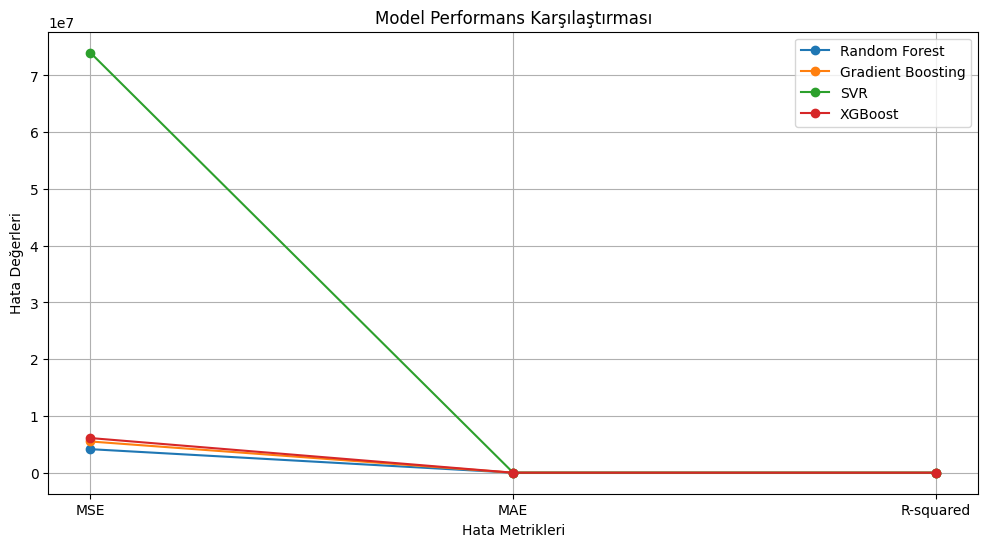

In [133]:
# Farklı algoritmaları kullanarak modeller oluşturun
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

results = {}  # Model performans sonuçlarını saklamak için bir sözlük
comparisons = {} # Model sonucunda tahmin değerleri ile gerçek değerleri karşılaştırmak için sözlük

# Modelleri eğitin ve performans sonuçlarını kaydedin
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    comparisons[name] = {'y_test' : y_test,'y_pred' : y_pred}
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

# Sonuçları görselleştirin
plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.plot(list(result.keys()), list(result.values()), marker='o', label=name)

plt.xlabel('Hata Metrikleri')
plt.ylabel('Hata Değerleri')
plt.title('Model Performans Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, result in results.items():
    print(f"{name} Modeli:")
    print("Mean Squared Error (MSE):", result['MSE'])
    print("Mean Absolute Error (MAE):", result['MAE'])
    print("R-squared:", result['R-squared'])
    print("\n")

Model Performans Sonuçları:
Random Forest Modeli:
Mean Squared Error (MSE): 4150096.7532414356
Mean Absolute Error (MAE): 1425.6105322580647
R-squared: 0.940100541616665


Gradient Boosting Modeli:
Mean Squared Error (MSE): 5504701.797514304
Mean Absolute Error (MAE): 1647.9939804144444
R-squared: 0.9205491640706105


SVR Modeli:
Mean Squared Error (MSE): 74003552.59298135
Mean Absolute Error (MAE): 5471.244919837932
R-squared: -0.06811310249574554


XGBoost Modeli:
Mean Squared Error (MSE): 6106854.998252695
Mean Absolute Error (MAE): 1681.2652549773186
R-squared: 0.9118581255882305




In [135]:
# Tahmin edilen değerlerle gerçek değerleri karşılaştırın
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, comparison in comparisons.items():
    print(f"{name} Modeli:")
    comparison_df = pd.DataFrame({'Gerçek Değerler': comparison['y_test'], 'Tahmin Edilen Değerler': comparison['y_pred'] })

    print(comparison_df)
    print("\n")

Model Performans Sonuçları:
Random Forest Modeli:
     Gerçek Değerler  Tahmin Edilen Değerler
15         30760.000                34481.18
9          17859.167                19191.38
100         9549.000                 9064.94
132        11850.000                13860.19
68         28248.000                27337.73
..               ...                     ...
56         11845.000                13655.66
128        37028.000                32622.01
76          5389.000                 5897.41
144         9233.000                11430.41
104        17199.000                18462.62

[62 rows x 2 columns]


Gradient Boosting Modeli:
     Gerçek Değerler  Tahmin Edilen Değerler
15         30760.000            35380.009027
9          17859.167            19095.156275
100         9549.000             9059.580364
132        11850.000            13646.295265
68         28248.000            30720.230475
..               ...                     ...
56         11845.000            13949.661776